## Comparing Headband vs. PSG Sleep Monitoring Effectiveness

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, classification_report


In [2]:
sub_no = 6
# Load the data
data = pd.read_csv(f'Dataset_clean_for_jupyter\\sub-{sub_no}\\eeg\\sub-{sub_no}_majority_aiPSG_aiHB_events.tsv', sep='\t')

# Check the data structure
# print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   onset     998 non-null    int64
 1   majority  998 non-null    int64
 2   ai_psg    998 non-null    int64
 3   ai_hb     998 non-null    int64
dtypes: int64(4)
memory usage: 31.3 KB
None
              onset    majority      ai_psg       ai_hb
count    998.000000  998.000000  998.000000  998.000000
mean   14955.000000    2.118236    2.102204    2.067134
std     8647.262573    1.117943    1.128448    1.162133
min        0.000000    0.000000    0.000000   -2.000000
25%     7477.500000    2.000000    2.000000    2.000000
50%    14955.000000    2.000000    2.000000    2.000000
75%    22432.500000    2.000000    2.000000    2.000000
max    29910.000000    4.000000    4.000000    4.000000
onset       0
majority    0
ai_psg      0
ai_hb       0
dtype: int64


In [3]:
# Calculate simple agreement percentages
agreement_human_psg = np.mean(data['majority'] == data['ai_psg']) * 100
agreement_human_hb = np.mean(data['majority'] == data['ai_hb']) * 100
agreement_psg_hb = np.mean(data['ai_psg'] == data['ai_hb']) * 100

print(f"Agreement between human labels and AI-PSG: {agreement_human_psg:.2f}%")
print(f"Agreement between human labels and AI-Headband: {agreement_human_hb:.2f}%")
print(f"Agreement between AI-PSG and AI-Headband: {agreement_psg_hb:.2f}%")

Agreement between human labels and AI-PSG: 93.29%
Agreement between human labels and AI-Headband: 92.18%
Agreement between AI-PSG and AI-Headband: 93.69%


In [4]:
# Calculate Cohen's Kappa for both devices vs human labels
kappa_psg = cohen_kappa_score(data['majority'], data['ai_psg'])
kappa_hb = cohen_kappa_score(data['majority'], data['ai_hb'])

print(f"Cohen's Kappa between human and AI-PSG: {kappa_psg:.4f}")
print(f"Cohen's Kappa between human and AI-Headband: {kappa_hb:.4f}")

Cohen's Kappa between human and AI-PSG: 0.8736
Cohen's Kappa between human and AI-Headband: 0.8501


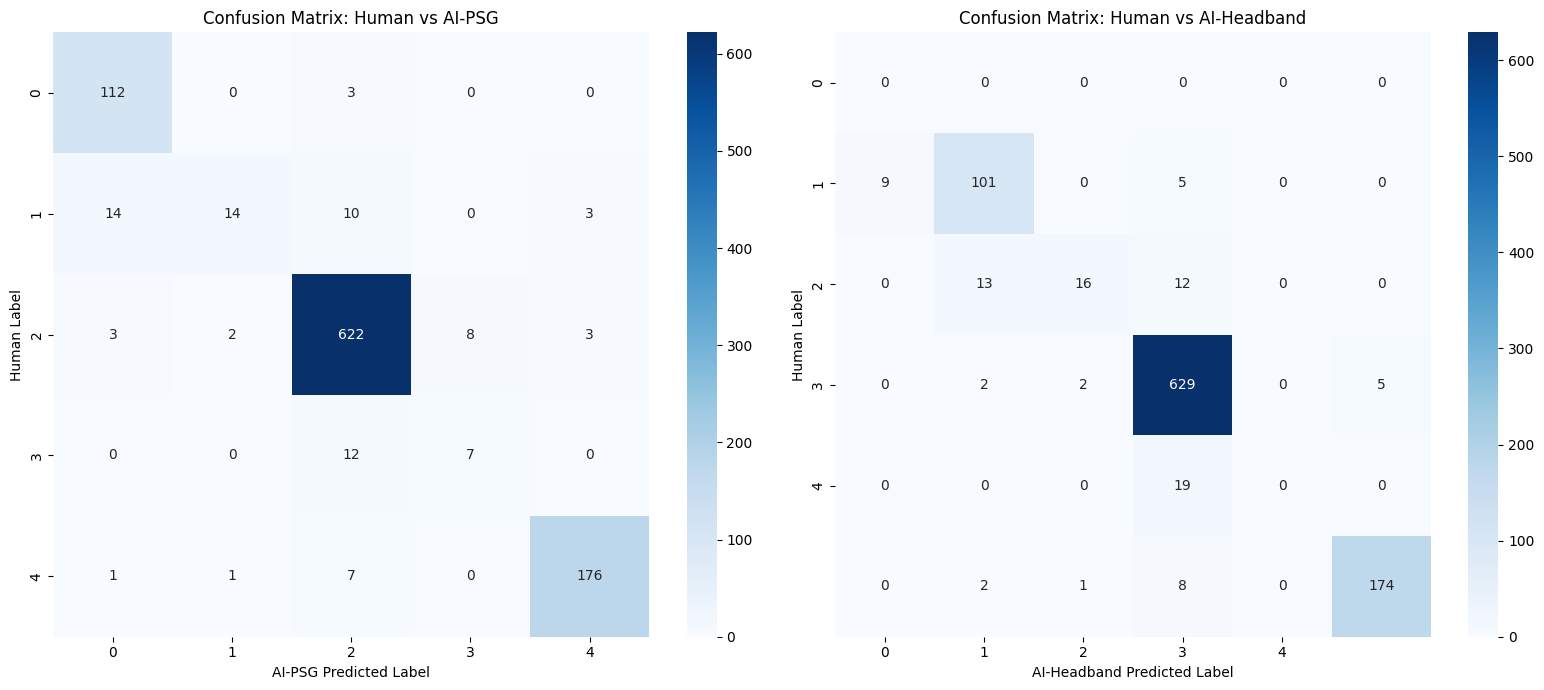

In [5]:
# Generate confusion matrices
cm_psg = confusion_matrix(data['majority'], data['ai_psg'])
cm_hb = confusion_matrix(data['majority'], data['ai_hb'])

# Get the unique sleep stages
sleep_stages = sorted(data['majority'].unique())

# Plot the confusion matrices
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.heatmap(cm_psg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sleep_stages, yticklabels=sleep_stages)
plt.xlabel('AI-PSG Predicted Label')
plt.ylabel('Human Label')
plt.title('Confusion Matrix: Human vs AI-PSG')

plt.subplot(1, 2, 2)
sns.heatmap(cm_hb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sleep_stages, yticklabels=sleep_stages)
plt.xlabel('AI-Headband Predicted Label')
plt.ylabel('Human Label')
plt.title('Confusion Matrix: Human vs AI-Headband')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

In [6]:
# Calculate metrics for each sleep stage
for device, labels in [('PSG', 'ai_psg'), ('Headband', 'ai_hb')]:
    print(f"\nPerformance metrics for {device}:")
    
    # Classification report
    report = classification_report(data['majority'], data[labels], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(report_df.round(3))
    
    # Calculate metrics per sleep stage
    for stage in sleep_stages:
        precision = precision_score(
            data['majority'] == stage, 
            data[labels] == stage, 
            zero_division=0
        )
        recall = recall_score(
            data['majority'] == stage, 
            data[labels] == stage, 
            zero_division=0
        )
        f1 = f1_score(
            data['majority'] == stage, 
            data[labels] == stage, 
            zero_division=0
        )
        
        # print(f"{device} - Stage {stage}:")
        # print(f"  Precision: {precision:.4f}")
        # print(f"  Recall: {recall:.4f}")
        # print(f"  F1-Score: {f1:.4f}")


Performance metrics for PSG:
              precision  recall  f1-score  support
0                 0.862   0.974     0.914  115.000
1                 0.824   0.341     0.483   41.000
2                 0.951   0.975     0.963  638.000
3                 0.467   0.368     0.412   19.000
4                 0.967   0.951     0.959  185.000
accuracy          0.933   0.933     0.933    0.933
macro avg         0.814   0.722     0.746  998.000
weighted avg      0.929   0.933     0.926  998.000

Performance metrics for Headband:
              precision  recall  f1-score  support
-2                0.000   0.000     0.000    0.000
0                 0.856   0.878     0.867  115.000
1                 0.842   0.390     0.533   41.000
2                 0.935   0.986     0.960  638.000
3                 0.000   0.000     0.000   19.000
4                 0.972   0.941     0.956  185.000
accuracy          0.922   0.922     0.922    0.922
macro avg         0.601   0.532     0.553  998.000
weighted avg     

C:\Users\naikh\anaconda3\envs\TensorFlowEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\naikh\anaconda3\envs\TensorFlowEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\naikh\anaconda3\envs\TensorFlowEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

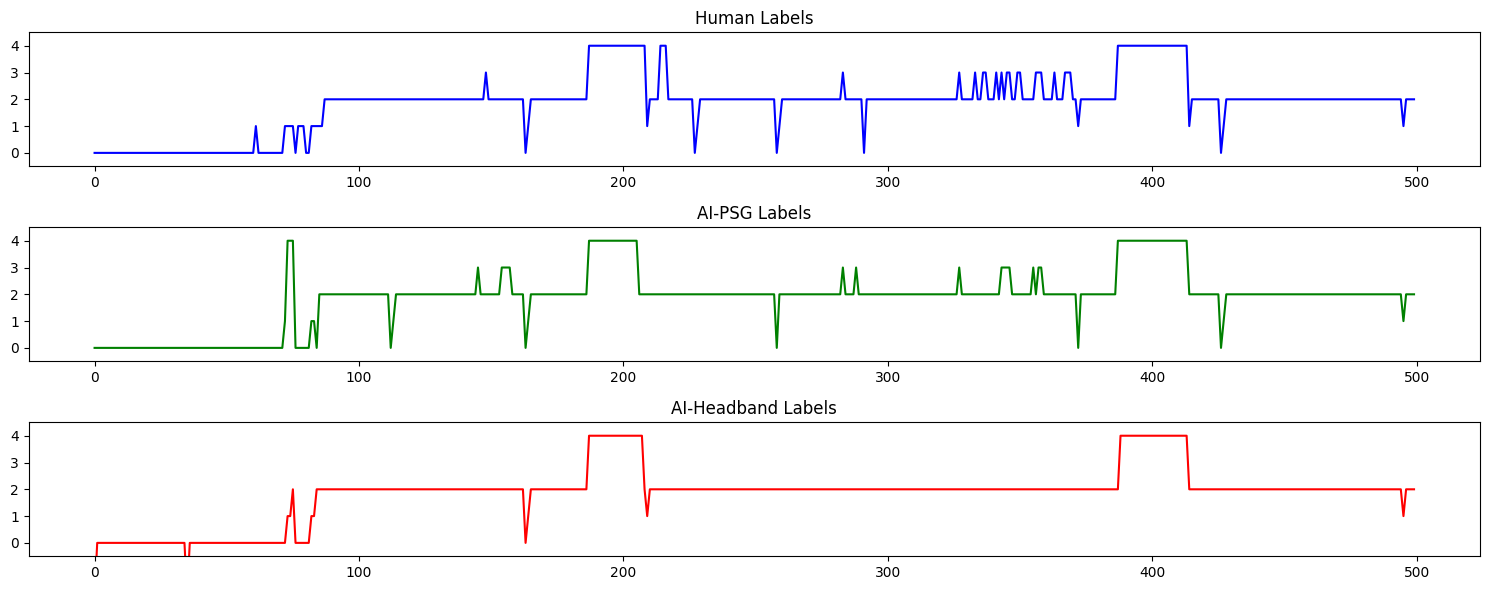

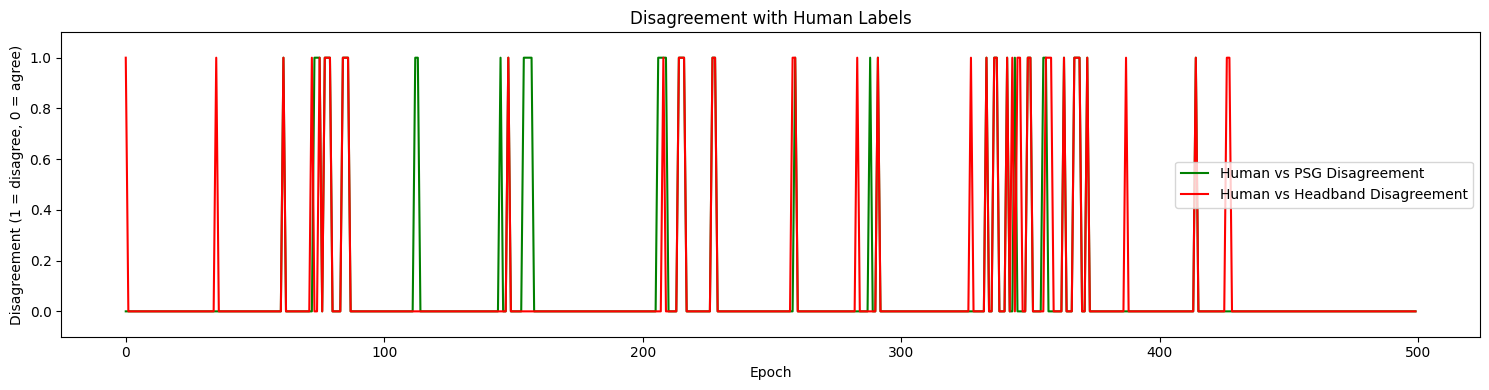

In [7]:
# Create a visualization to compare predictions across methods
plt.figure(figsize=(15, 6))

# Sample a subset of data for visualization (e.g., first 500 epochs)
sample_size = min(500, len(data))
x = range(sample_size)

plt.subplot(3, 1, 1)
plt.plot(x, data['majority'][:sample_size], 'b-', label='Human')
plt.title('Human Labels')
plt.ylim(min(sleep_stages) - 0.5, max(sleep_stages) + 0.5)
plt.yticks(sleep_stages)

plt.subplot(3, 1, 2)
plt.plot(x, data['ai_psg'][:sample_size], 'g-', label='AI-PSG')
plt.title('AI-PSG Labels')
plt.ylim(min(sleep_stages) - 0.5, max(sleep_stages) + 0.5)
plt.yticks(sleep_stages)

plt.subplot(3, 1, 3)
plt.plot(x, data['ai_hb'][:sample_size], 'r-', label='AI-Headband')
plt.title('AI-Headband Labels')
plt.ylim(min(sleep_stages) - 0.5, max(sleep_stages) + 0.5)
plt.yticks(sleep_stages)

plt.tight_layout()
plt.savefig('label_comparison.png')
plt.show()

# Create a disagreement plot
disagreement_psg = (data['majority'] != data['ai_psg']).astype(int)
disagreement_hb = (data['majority'] != data['ai_hb']).astype(int)

plt.figure(figsize=(15, 4))
plt.plot(x, disagreement_psg[:sample_size], 'g-', label='Human vs PSG Disagreement')
plt.plot(x, disagreement_hb[:sample_size], 'r-', label='Human vs Headband Disagreement')
plt.legend()
plt.title('Disagreement with Human Labels')
plt.xlabel('Epoch')
plt.ylabel('Disagreement (1 = disagree, 0 = agree)')
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.savefig('disagreement_plot.png')
plt.show()

In [8]:
# Analyze how well each device captures transitions between sleep stages
def analyze_transitions(true_labels, pred_labels):
    transitions_true = sum(1 for i in range(1, len(true_labels)) if true_labels[i] != true_labels[i-1])
    transitions_pred = sum(1 for i in range(1, len(pred_labels)) if pred_labels[i] != pred_labels[i-1])
    
    # Calculate detected transitions
    detected_transitions = 0
    for i in range(1, len(true_labels)):
        if true_labels[i] != true_labels[i-1] and pred_labels[i] != pred_labels[i-1]:
            detected_transitions += 1
    
    transition_recall = detected_transitions / transitions_true if transitions_true > 0 else 0
    
    return {
        'true_transitions': transitions_true,
        'predicted_transitions': transitions_pred,
        'detected_transitions': detected_transitions,
        'transition_recall': transition_recall
    }

psg_transitions = analyze_transitions(data['majority'].values, data['ai_psg'].values)
hb_transitions = analyze_transitions(data['majority'].values, data['ai_hb'].values)

print("\nTransition Analysis:")
print(f"PSG transitions analysis: {psg_transitions}")
print(f"Headband transitions analysis: {hb_transitions}")


Transition Analysis:
PSG transitions analysis: {'true_transitions': 93, 'predicted_transitions': 68, 'detected_transitions': 41, 'transition_recall': 0.44086021505376344}
Headband transitions analysis: {'true_transitions': 93, 'predicted_transitions': 51, 'detected_transitions': 27, 'transition_recall': 0.2903225806451613}


In [9]:
# Create a summary table of all metrics
summary = pd.DataFrame({
    'Metric': [
        'Overall Agreement (%)', 
        'Cohen\'s Kappa', 
        'Transition Detection Rate'
    ],
    'PSG': [
        agreement_human_psg,
        kappa_psg,
        psg_transitions['transition_recall']
    ],
    'Headband': [
        agreement_human_hb,
        kappa_hb,
        hb_transitions['transition_recall']
    ]
})

print("\nSummary Comparison:")
print(summary)


Summary Comparison:
                      Metric        PSG   Headband
0      Overall Agreement (%)  93.286573  92.184369
1              Cohen's Kappa   0.873635   0.850060
2  Transition Detection Rate   0.440860   0.290323
